# Boston Housing data Set

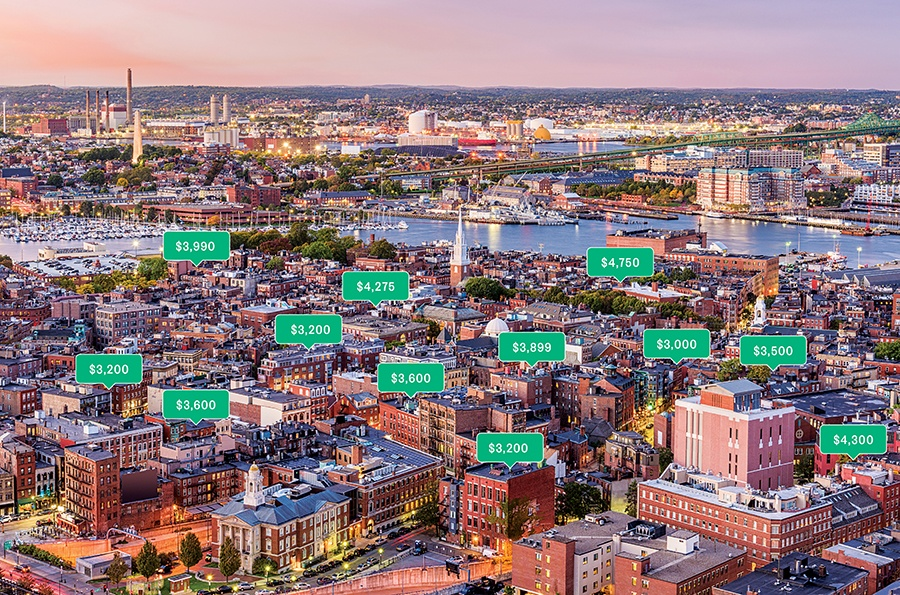

# About Data set

### The data set has following columns, the column "MEDV" is target column which is modified as 
### if MEDV> Dollar 22K then it is a high price house( value of MEDV is 1),else 0

### Using the classification algorithm we are going to classify if the house will fall under high price or low price category.
crim-per capita crime rate by town.

zn-proportion of residential land zoned for lots over 25,000 sq.ft.

indus-proportion of non-retail business acres per town.

chas-Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox-nitrogen oxides concentration (parts per 10 million).

rm-average number of rooms per dwelling.

age-proportion of owner-occupied units built prior to 1940.

dis-weighted mean of distances to five Boston employment centres.

rad-index of accessibility to radial highways.

tax-full-value property-tax rate per $10,000.

ptratio-pupil-teacher ratio by town.

black-1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat-lower status of the population (percent).

medv-median value of owner-occupied homes in $1000s.

## Exploring Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\STUFFBOX\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#read the data into a dataframe using pandas
df = pd.read_csv("E:\BOSTON.csv")

In [4]:
df.shape #checking the shape of data

(506, 14)

In [3]:
#checking head of the data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
#checking null cells present in each column
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
#get some stats
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Handling missing values
#### The rows containing the nulls can be dropped from the dataset or we can impute the missing valures using proper method

In [7]:
#filling the null cells with median
df.fillna(df.median(),inplace=True)

In [8]:
#checking again null cells present in each column- No Nulls
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# EDA
### Univariate Analysis

In [10]:
#making a list of columns
list=df.columns

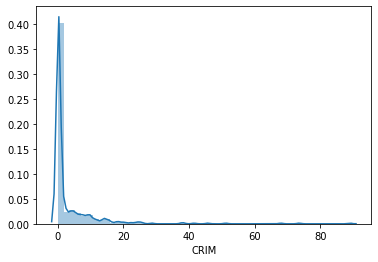

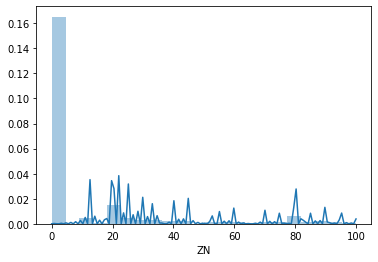

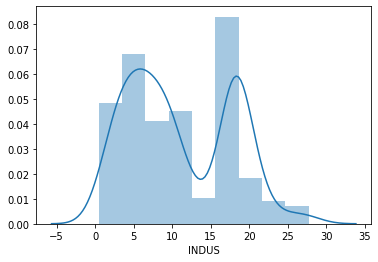

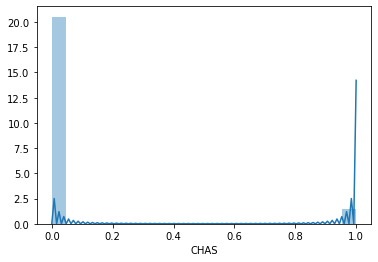

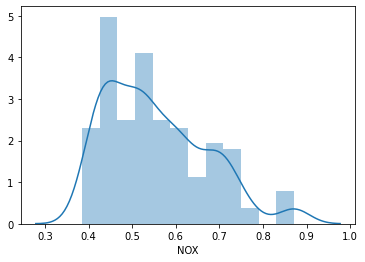

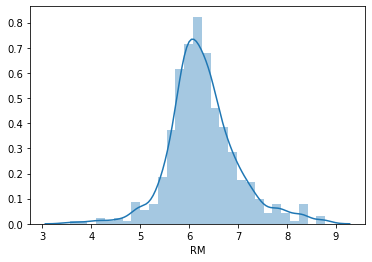

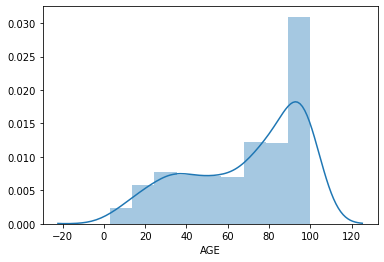

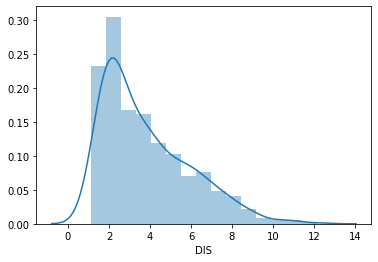

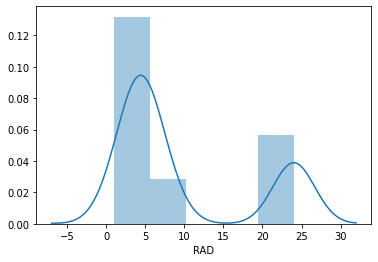

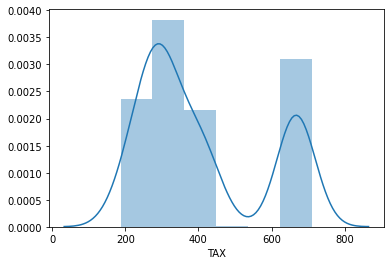

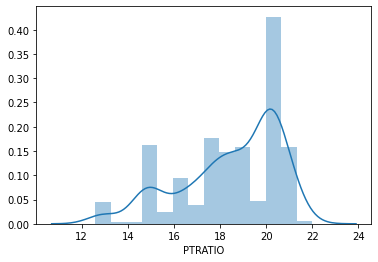

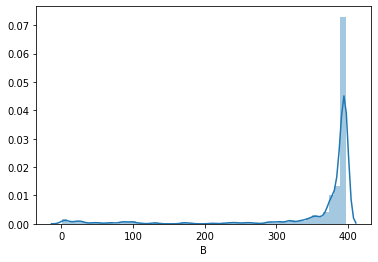

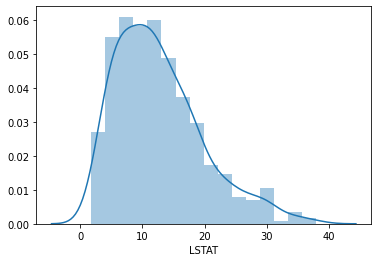

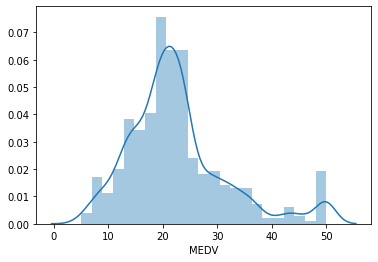

In [12]:
#Visulaising how data is distributed,or spread
for i in list :
    sns.distplot(df[i])
    plt.show()

# Bi-variate Analysis

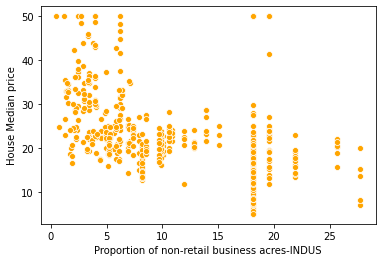

In [6]:
sns.scatterplot(y=df["MEDV"],x=df["INDUS"],color="orange")
plt.xlabel("Proportion of non-retail business acres-INDUS")
plt.ylabel("House Median price")
plt.show()


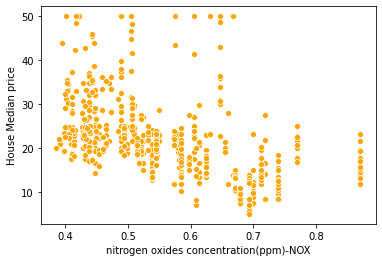

In [8]:
sns.scatterplot(y=df["MEDV"],x=df["NOX"],color="orange")
plt.xlabel("nitrogen oxides concentration(ppm)-NOX")
plt.ylabel("House Median price")
plt.show()

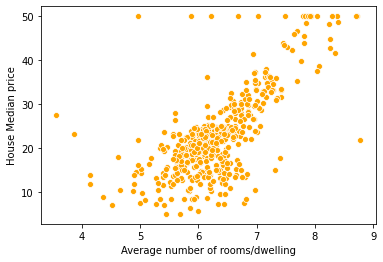

In [24]:
sns.scatterplot(y=df["MEDV"],x=df["RM"],color="orange")
plt.xlabel("Average number of rooms/dwelling")
plt.ylabel("House Median price")
plt.show()

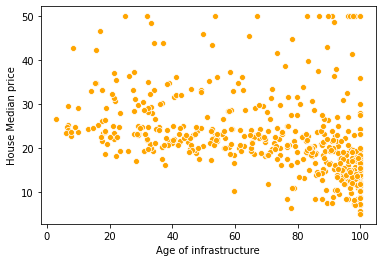

In [25]:
sns.scatterplot(y=df["MEDV"],x=df["AGE"] ,color="orange")
plt.xlabel("Age of infrastructure")
plt.ylabel("House Median price")
plt.show()

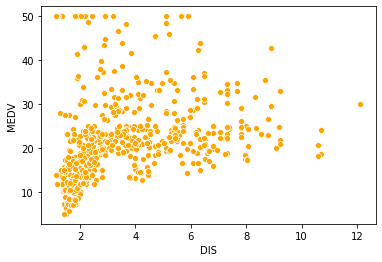

In [22]:
sns.scatterplot(y=df["MEDV"],x=df["DIS"],color="orange")
plt.show()

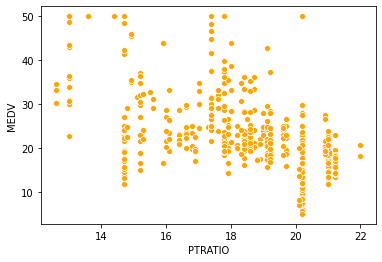

In [12]:
sns.scatterplot(y=df["MEDV"],x=df["PTRATIO"],color="orange")
plt.show()

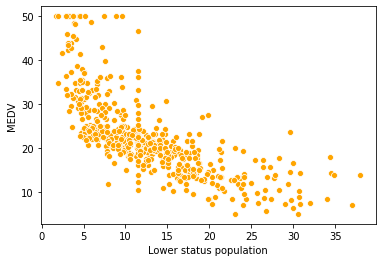

In [13]:
sns.scatterplot(y=df["MEDV"],x=df["LSTAT"],color="orange")
plt.xlabel("Lower status population")
plt.show()

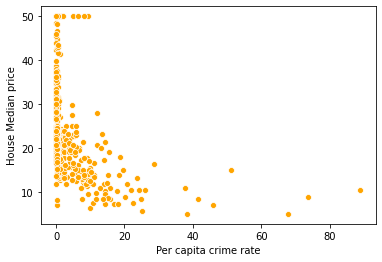

In [16]:
sns.scatterplot(y=df["MEDV"],x=df["CRIM"],color="orange")
plt.xlabel("Per capita crime rate")
plt.ylabel("House Median price")
plt.show()

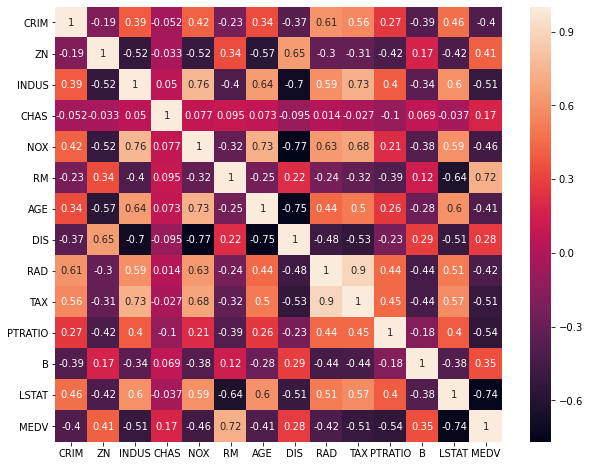

In [55]:
#Plotting heat map
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

## Visualising relation among variables

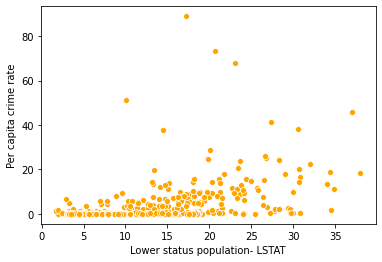

In [22]:
sns.scatterplot(y=df["CRIM"],x=df["LSTAT"],color="orange")
plt.xlabel("Lower status population- LSTAT")
plt.ylabel("Per capita crime rate")
plt.show()

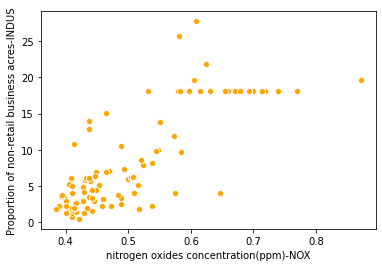

In [28]:
sns.scatterplot(y=df["INDUS"],x=df["NOX"],color="orange")
plt.xlabel("nitrogen oxides concentration(ppm)-NOX")
plt.ylabel("Proportion of non-retail business acres-INDUS")
plt.show()

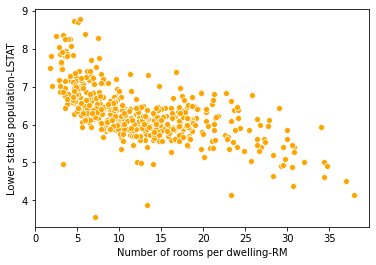

In [29]:
sns.scatterplot(y=df["RM"],x=df["LSTAT"],color="orange")
plt.xlabel("Number of rooms per dwelling-RM")
plt.ylabel("Lower status population-LSTAT")
plt.show()

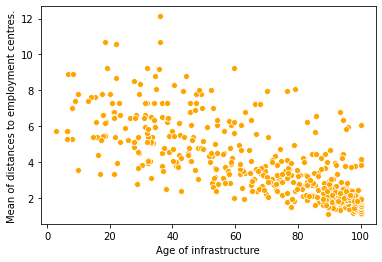

In [30]:
sns.scatterplot(y=df["DIS"],x=df["AGE"],color="orange")
plt.xlabel("Age of infrastructure")
plt.ylabel("Mean of distances to employment centres.")
plt.show()

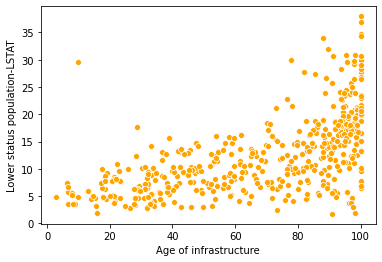

In [31]:
sns.scatterplot(y=df["LSTAT"],x=df["AGE"],color="orange")
plt.xlabel("Age of infrastructure")
plt.ylabel("Lower status population-LSTAT")
plt.show()

#  Data Modelling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [20]:
#modifying the target column
df['MEDV']=np.where(df['MEDV']>22,1,0) #house whose price is greater than $22K is in class 1,otherwiwe class 0

In [21]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,1


In [22]:
#class imbalance check
df['MEDV'].value_counts()

0    284
1    222
Name: MEDV, dtype: int64

In [24]:
#separating the features and target columns
x=df.drop("MEDV", axis=1)
y=df["MEDV"]


In [25]:
#train test split 70-30

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

# Clssification using Support Vectors

## Training with default model of SVC

In [26]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [27]:
predictions = svc_model.predict(x_test)

In [28]:
print(confusion_matrix(y_test,predictions)) #63%

[[62 14]
 [19 57]]


In [29]:
svc_model.score(x_test,y_test) #78.2 %

0.7828947368421053

## Training with linear kernel of SVC

In [30]:
svc_model = SVC(C=1,kernel='linear')
svc_model.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [35]:
predictions_svc = svc_model.predict(x_test)
cm=np.array(confusion_matrix(y_test,predictions_svc,labels=[0,1]))
dc=pd.DataFrame(cm,index=["zero","one"],columns=["predicted_zero","predicted_one"])
dc 

,predicted_zero,predicted_one
zero,72,4
one,15,61


In [37]:
#score with linear kernel 87.5%
svc_model.score(x_test,y_test)

0.875

### Finding best parameters using GridSEARCH

In [38]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {'C': [1,0.1, 100], 'gamma': [1,0.1,0.001],'kernel':['linear','rbf']} 

In [44]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=3)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.4s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.4s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.4s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.4s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  2.5min finished


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 0.1, 100], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [45]:
print("Best Parameters list from Gridserach")
print(grid.best_params_)

Best Parameters list from Gridserach
{'C': 100, 'gamma': 1, 'kernel': 'linear'}


In [46]:
grid_predictions = grid.predict(x_test)

In [48]:
print(confusion_matrix(y_test,grid_predictions)) # Accuracy=77.84%

[[65 11]
 [18 58]]


# Clssification using Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions_log = logmodel.predict(x_test)

C:\Users\STUFFBOX\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
cm=np.array(confusion_matrix(y_test,predictions_log,labels=[0,1]))
dc=pd.DataFrame(cm,index=["zero","one"],columns=["predicted_zero","predicted_one"])
dc  

,predicted_zero,predicted_one
zero,66,10
one,15,61


In [52]:
logmodel.score(x_test,y_test)

0.8355263157894737

So out of all model accuracy, 87.5% is the highest, which is model of classification of SVM with c=1, and kernel =linear.- CANDIDATE MODEL

In [56]:
#making a function to predict the house class,given the input
def zero_or_one(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13):
    if svc_model.predict([[x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13]])==0:
        print('Class 0:- Hurray!!!You can get a house with median price less than $22K as per your requirements')
    else:
        print('Class 1:- Given your requirements,you can get a house with median price more than $22K')

Lets check by taking input from customers to know in which range they can get the house based on their conditions or preferences.

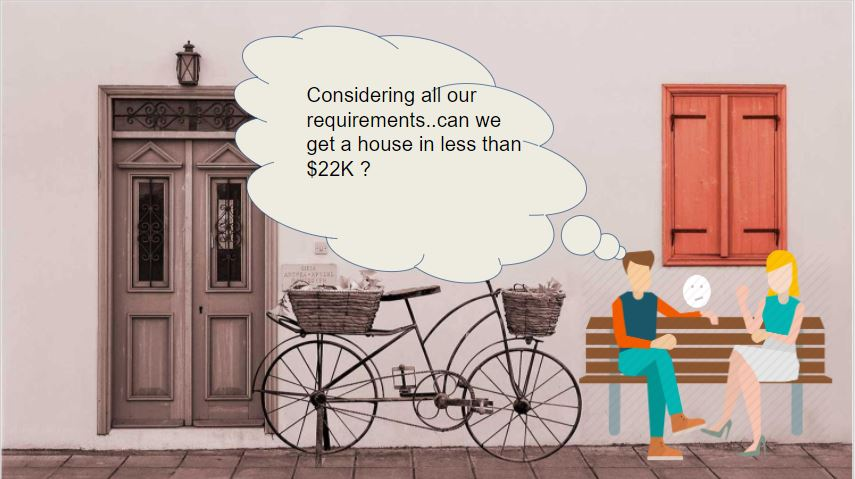

In [57]:
           #CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT
zero_or_one(0.2731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,30.8,396.90,10.14)

#customer budget below $22K

Class 0:- Hurray!!!You can get a house with median price less than $22K as per your requirements


In [58]:
#customer budget above $22K          
            #CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT
zero_or_one(0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98)



Class 1:- Given your requirements,you can get a house with median price more than $22K
